In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Intern/Sara/GOOGL LST.csv")

data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [ ]:
close_price = data[['Close']]

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_price)


In [ ]:
def create_dataset(dataset, time_step=10):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i+time_step, 0])
        y.append(dataset[i+time_step, 0])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)


In [ ]:
X = X.reshape(X.shape[0], X.shape[1], 1)


In [ ]:
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(time_step,1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X, y, epochs=20, batch_size=32)

Epoch 1/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0409
Epoch 2/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.9117e-04
Epoch 3/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5329e-04
Epoch 4/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9701e-04
Epoch 5/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6150e-04
Epoch 6/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7779e-04
Epoch 7/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2287e-04
Epoch 8/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1508e-04
Epoch 9/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7741e-04
Epoch 10/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0799e-04
Epoch 11/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9416e-04
Epoch 12/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6646e-04
Epoch 13/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4989e-04
Epoch 14/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5312e-04
Epoch 15/20
95/95 ━━━━━━━━━━━━━━━

In [ ]:
predicted = model.predict(X)
predicted = scaler.inverse_transform(predicted.reshape(-1,1))
actual = scaler.inverse_transform(y.reshape(-1,1))


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


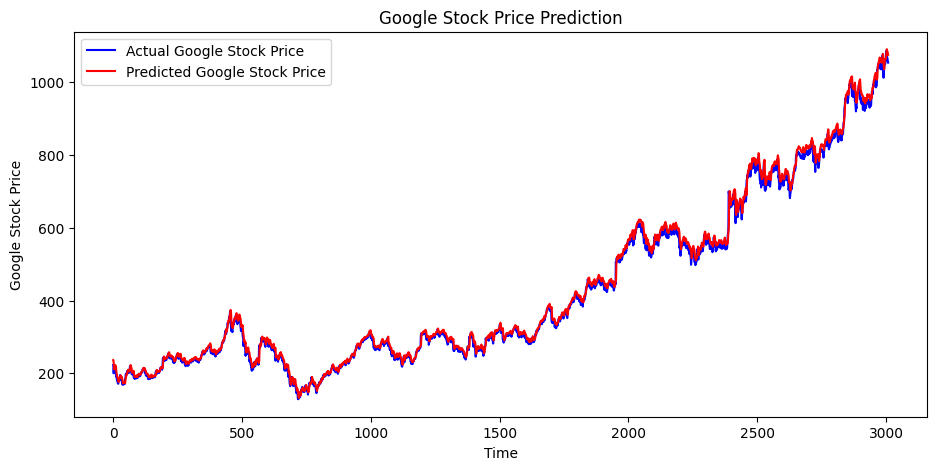

In [ ]:
plt.figure(figsize=(11,5))
plt.plot(actual, color='blue', label='Actual Google Stock Price')
plt.plot(predicted, color='red', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()